<a href="https://colab.research.google.com/github/palakgupta1214/Kidney-Stone-Detection/blob/main/KidneyStoneDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os

# Define the path to your image folder in Google Drive
DIR = '/content/drive/My Drive/ctscan/'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [ ]:
CATEGORIES=["normal","stone"]

In [ ]:
training_data=[]

def train_data():
    for categories in CATEGORIES:
        path=os.path.join(DIR,categories)
        class_num=CATEGORIES.index(categories)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(128,128))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
train_data()

In [ ]:
import random
random.shuffle(training_data)

In [ ]:
# NORMAL = 0

1


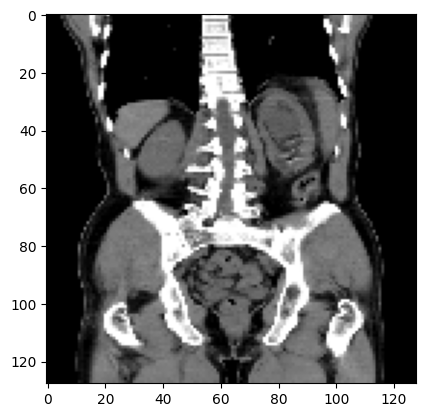

In [ ]:
plt.imshow(training_data[3][0],cmap='gray') #image index
print(training_data[3][1]) #label index

In [ ]:
# KIDNEY_STONE = 1

In [ ]:
X=[]
y=[]

In [ ]:
for features,labels in training_data:
    X.append(features)
    y.append(labels)
X=np.array(X)
y=np.array(y)
##X.append(features) adds the image data to the X list, while y.append(labels) adds the class labels to the y list.

In [ ]:
X.shape

(1609, 128, 128, 3)

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.1,random_state=1)
print(len(Xtrain),len(Xtest),len(ytrain),len(ytest))
Xtrain=np.array(Xtrain)
Xtest=np.array(Xtest)

1448 161 1448 161


In [ ]:
Xtrain=np.array(Xtrain)
Xtest=np.array(Xtest)

1


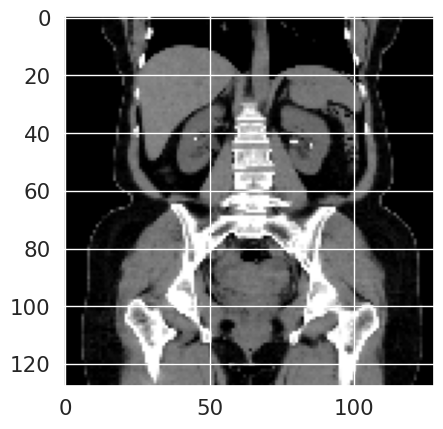

In [ ]:
plt.imshow(Xtrain[6],cmap='gray')
print(ytrain[6])

In [ ]:
print(ytrain[6])

1


In [ ]:
import numpy as np
import cv2 as cv
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense, Conv2D, Flatten, Convolution2D, Activation
from keras.layers import Dropout, MaxPooling2D
from tensorflow.keras.applications import ResNet50,Xception
import pickle

In [ ]:
def median_blur(img):
    #res = cv2.cvtColor(median_blur, cv2.COLOR_BGR2GRAY)
    mb = cv2.medianBlur(img, 1)
    res=hist(mb)
    return res

def hist(img):
    res = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gamma_corrected = np.array(255*(res / 255) ** 2.5, dtype = 'uint8')
    thres=thresholding_img(gamma_corrected)
    return thres

def thresholding_img(img):
    ret, thresh1 = cv2.threshold(img, 250,255, cv2.THRESH_BINARY)
    return thresh1

processed_img=[]
for img in Xtrain:
    res=median_blur(img)
    processed_img.append(res)

processed_img=np.array(processed_img)

In [ ]:
ytrain[:10]

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0])

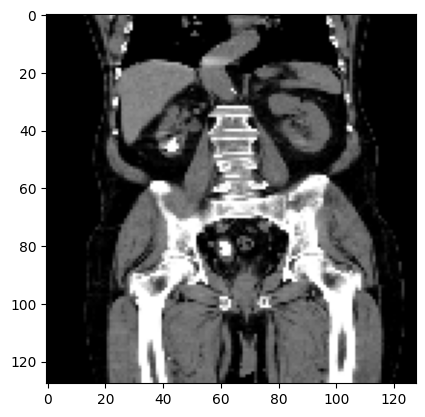

In [ ]:
plt.imshow(Xtrain[100],cmap='gray')

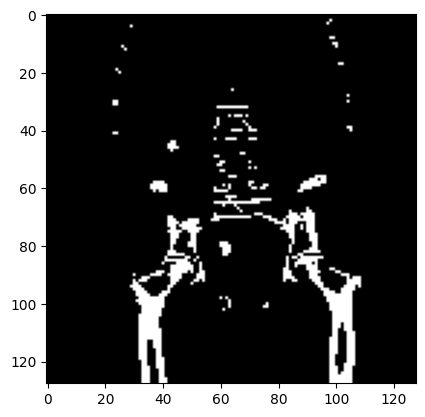

In [ ]:
plt.imshow(processed_img[100],cmap='gray')

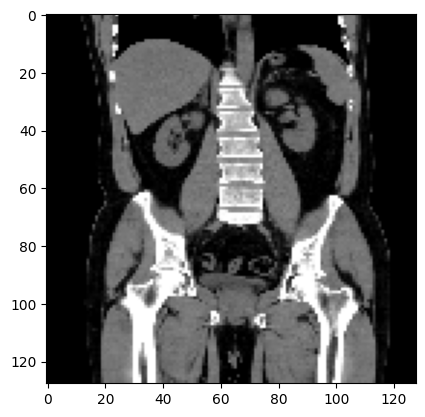

In [ ]:
plt.imshow(Xtrain[9],cmap='gray')

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense, Conv2D, Flatten, Convolution2D, Activation, Dropout, MaxPooling2D

In [ ]:
model=Sequential() ##linear stack of layers
model.add(Convolution2D(128, 3, 3, input_shape=(128, 128, 1))) ##128:filters,3*3 kernal size
model.add(Activation('relu')) ##introduces non-linearity
model.add (MaxPooling2D(pool_size=(2, 2))) ##reduce dimenshions, allows to msake asssumption:downsampling
model.add(Convolution2D(128, 3, 3)) ##adds another 2d layer
model.add(Activation('relu'))
model.add (MaxPooling2D(pool_size=(2, 2))) ##for further downsampling
model.add(Flatten()) ##used to flatten the multi-dimensional input into a 1D array before feeding it into the densely connected layer
model.add(Dense(128))  #adds a fully connected (dense) layer to the model with 128 units.
model.add(Activation('relu'))
model.add(Dropout(0.4)) #regularization technique where a proportion (0.4 in this case) of input units are randomly set to 0 at each update during training, which helps prevent overfitting.
model.add(Dense(1)) #output layer has 1 unit since this seems to be a binary classification problem.
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
#compiles the model, specifying the loss function as binary_crossentropy, the optimizer as RMSprop, and the metric to monitor as accuracy

In [ ]:
model.fit(processed_img, ytrain, epochs=25, batch_size=100)

Epoch 1/25
15/15 [==============================] - 18s 1s/step - loss: 10.3146 - accuracy: 0.4972
Epoch 2/25
15/15 [==============================] - 6s 374ms/step - loss: 0.8351 - accuracy: 0.5642
Epoch 3/25
15/15 [==============================] - 6s 423ms/step - loss: 0.6728 - accuracy: 0.6367
Epoch 4/25
15/15 [==============================] - 8s 534ms/step - loss: 0.6612 - accuracy: 0.6637
Epoch 5/25
15/15 [==============================] - 6s 384ms/step - loss: 0.5171 - accuracy: 0.7403
Epoch 6/25
15/15 [==============================] - 7s 479ms/step - loss: 0.5041 - accuracy: 0.7597
Epoch 7/25
15/15 [==============================] - 7s 441ms/step - loss: 0.4270 - accuracy: 0.7949
Epoch 8/25
15/15 [==============================] - 6s 366ms/step - loss: 0.3427 - accuracy: 0.8501
Epoch 9/25
15/15 [==============================] - 8s 569ms/step - loss: 0.2319 - accuracy: 0.9144
Epoch 10/25
15/15 [==============================] - 6s 366ms/step - loss: 0.2108 - accuracy: 0.9227


In [ ]:
Xtest_processed_img=[]
for img in Xtest:
    res=median_blur(img)
    Xtest_processed_img.append(res)
Xtest_processed_img=np.array(Xtest_processed_img)
##preprocessing of test images
##stores them in X_test_prcessed_img

In [ ]:
ypred=model.predict(Xtest_processed_img)  ##makes prediction on the test data
##6 is the batch number

6/6 [==============================] - 0s 49ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cc=confusion_matrix(ytest,(ypred>0.75)*1) ##convert the predicted probabilities to binary class predictions based on the threshold of 0.75.
cc

##The choice of threshold is often determined by weighing the trade-off between false positives and false negatives.
##For example, in scenarios where the cost of missing positive cases is high, a lower threshold might be chosen to capture more positive cases at the expense of higher false positive rate.
##Conversely, in cases where precision is crucial, a higher threshold may be chosen to reduce false positive rate, even if it leads to more false negatives.

array([[72, 15],
       [19, 55]])

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(ytest,(ypred>0.75)*1)
score*100
##computes the accuracy of the predicted binary class labels compared to the true binary class labels

72.04968944099379

In [ ]:
def build_model(hp):
    model=keras.Sequential([
        keras.layers.Convolution2D(
            filters=hp.Int('conv_1_filter',min_value=32,max_value=128,step=16),
            kernel_size=hp.Choice('conv_1_kernel',values=[3,5]),
            activation='relu',
            input_shape=(128, 128, 1)
        ),
        keras.layers.MaxPooling2D(pool_size=(3, 3)),
        keras.layers.Conv2D(
            filters=hp.Int('conv_2_filter',min_value=32,max_value=128,step=16),
            kernel_size=hp.Choice('conv_2_kernel',values=[3,5]),
            activation='relu'
        ),
        keras.layers.MaxPooling2D(pool_size=(3, 3)),
        keras.layers.Flatten(),
        keras.layers.Dense(
            units=hp.Int('dense_1_units',min_value=32,max_value=128,step=16),
            activation='relu'
        ),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1,activation='sigmoid')
    ]
    )


    model.compile(optimizer=keras.optimizers.RMSprop(hp.Choice('learning_rate',values=[1e-2,1e-3])),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model


In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
tuner_search=RandomSearch(build_model,objective='val_accuracy',max_trials=5,overwrite=True)
tuner_search.search(processed_img,ytrain,epochs=5,validation_split=0.1)

Trial 5 Complete [00h 09m 23s]
val_accuracy: 0.565517246723175

Best val_accuracy So Far: 0.8689655065536499
Total elapsed time: 00h 28m 19s


In [ ]:
!pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.3 MB/s eta 0:00:00


In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [ ]:
model=tuner_search.get_best_models(num_models=1)[0]

In [ ]:
model.fit(processed_img, ytrain, epochs=7, batch_size=100,verbose=1)

Epoch 1/7
15/15 [==============================] - 120s 8s/step - loss: 0.5084 - accuracy: 0.7804
Epoch 2/7
15/15 [==============================] - 110s 7s/step - loss: 0.4236 - accuracy: 0.8191
Epoch 3/7
15/15 [==============================] - 102s 6s/step - loss: 0.4143 - accuracy: 0.8363
Epoch 4/7
15/15 [==============================] - 92s 6s/step - loss: 5.3780 - accuracy: 0.7507
Epoch 5/7
15/15 [==============================] - 95s 6s/step - loss: 0.3365 - accuracy: 0.8570
Epoch 6/7
15/15 [==============================] - 91s 6s/step - loss: 0.2818 - accuracy: 0.8860
Epoch 7/7
15/15 [==============================] - 91s 6s/step - loss: 0.2440 - accuracy: 0.8909


In [ ]:
model.fit(processed_img,ytrain,epochs=20,batch_size=100,verbose=1,validation_split=0.1)

Epoch 1/20
14/14 [==============================] - 35s 2s/step - loss: 0.1281 - accuracy: 0.9509 - val_loss: 0.2970 - val_accuracy: 0.8897
Epoch 2/20
14/14 [==============================] - 35s 2s/step - loss: 0.1188 - accuracy: 0.9532 - val_loss: 0.3707 - val_accuracy: 0.8828
Epoch 3/20
14/14 [==============================] - 35s 3s/step - loss: 0.0941 - accuracy: 0.9578 - val_loss: 0.5778 - val_accuracy: 0.8483
Epoch 4/20
14/14 [==============================] - 38s 3s/step - loss: 0.0972 - accuracy: 0.9655 - val_loss: 0.3667 - val_accuracy: 0.8897
Epoch 5/20
14/14 [==============================] - 35s 3s/step - loss: 0.0404 - accuracy: 0.9847 - val_loss: 0.7019 - val_accuracy: 0.7724
Epoch 6/20
14/14 [==============================] - 38s 3s/step - loss: 0.0554 - accuracy: 0.9785 - val_loss: 0.5740 - val_accuracy: 0.8966
Epoch 7/20
14/14 [==============================] - 35s 3s/step - loss: 0.0582 - accuracy: 0.9800 - val_loss: 0.3104 - val_accuracy: 0.9034
Epoch 8/20
14/14 [==

In [ ]:
model.save('C:/Users/HP/Desktop/dipproject')

In [ ]:
model = keras.models.load_model('C:/Users/HP/Desktop/dipproject')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 41, 41, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 80)        64080     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 80)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 11520)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [ ]:
# EVALUATING MODEL PERFORMANCE ON UNSEEN DATA

In [ ]:
Xtest_processed_img=[]
for img in Xtest:
    res=median_blur(img)
    Xtest_processed_img.append(res)

Xtest_processed_img=np.array(Xtest_processed_img)

In [ ]:
ypred=model.predict(Xtest_processed_img)

6/6 [==============================] - 1s 160ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cc=confusion_matrix(ytest,(ypred>0.75)*1)
cc

array([[83,  5],
       [25, 48]])

In [ ]:
#accuracy score is a general term for the overall accuracy of a model's predictions, while val_accuracy specifically refers to the accuracy calculated on a validation dataset.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,(ypred>0.7)*1)*100
# 0.8 to 0.7

86.33540372670807

In [ ]:
res=(ypred>0.75)*1
a=[]
for i in range(len(res)):
    if(res[i]==0 and res[i]!=ytest[i]):
        a.append(i)

In [ ]:
print(a)
print(len(a))

[8, 12, 13, 14, 16, 17, 18, 24, 39, 57, 61, 63, 64, 68, 83, 85, 88, 109, 118, 121, 129, 134, 141, 148, 149]
25


0


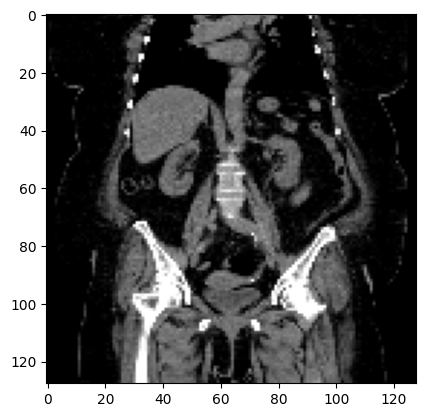

In [ ]:
plt.imshow(Xtest[85],cmap='gray')
print(ytest[85])

1


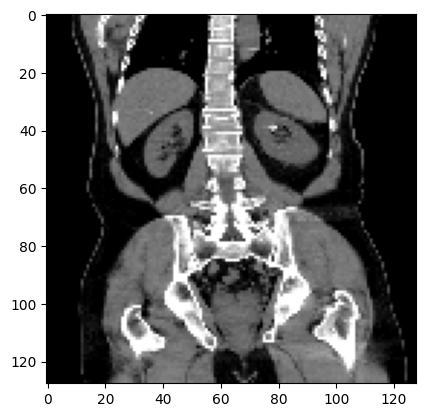

In [ ]:
plt.imshow(Xtest[100],cmap='gray')
print(ytest[100])

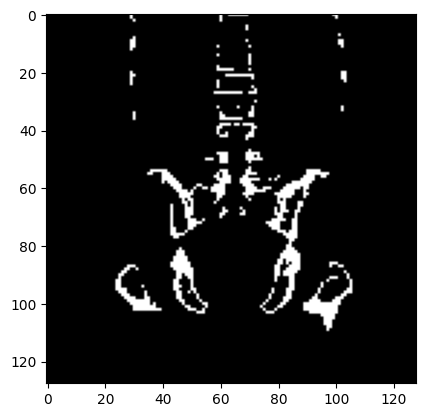

In [ ]:
res=median_blur(Xtest[124])
plt.imshow(res,cmap='gray')

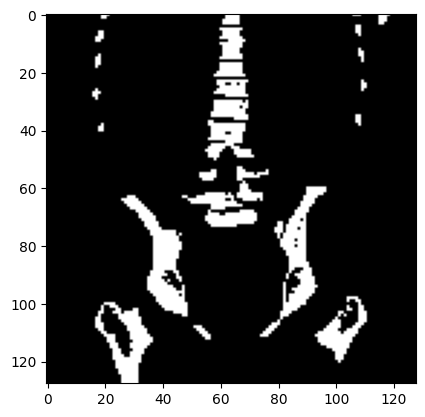

In [ ]:
res=median_blur(Xtest[95])
plt.imshow(res,cmap='gray')

In [ ]:
# TEST INDIVIDUAL IMAGE

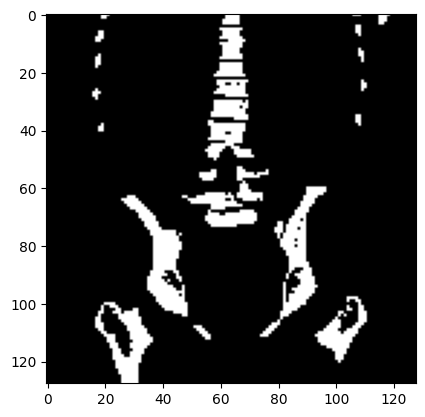

In [ ]:
plt.imshow(res,cmap='gray')
plt.show()

In [ ]:
res=res.reshape(-1,128,128,1)
ypred=model.predict(res)

1/1 [==============================] - 0s 56ms/step


In [ ]:
(ypred>0.75)*1

array([[0]])

In [ ]:
ypred

array([[0.00776383]], dtype=float32)

In [ ]:
training_data1=[]
path='/content/drive/My Drive/ktest'
for img in os.listdir(path):
            try:
                img_array=cv.imread(os.path.join(path,img))
                new_array=cv.resize(img_array,(128,128))
                training_data1.append(new_array)
            except Exception as e:
                pass

In [ ]:
def median_blur(img):
    mb = cv.medianBlur(img, 1)
    res=hist(mb)
    return res

def hist(img):
    res = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    gamma_corrected = np.array(255*(res / 255) ** 2.5, dtype = 'uint8')
    thres=thresholding_img(gamma_corrected)
    return thres

def thresholding_img(img):
    ret, thresh1 = cv.threshold(img, 100, 255, cv.THRESH_BINARY)
    return thresh1

processed_img=[]
for img in training_data1:
    res=median_blur(img)
    processed_img.append(res)

processed_img=np.array(processed_img)

In [ ]:
# It appears that the provided code defines a series of image processing functions (median_blur, hist, and thresholding_img) and then processes a set of images using these functions. Let's break down the code:

# 1. The `median_blur` function applies median blur, followed by histogram equalization, and finally, gamma correction to the input image.

# 2. The `hist` function converts an image to grayscale, applies gamma correction, and calls the `thresholding_img` function to apply a binary threshold.

# 3. The `thresholding_img` function applies binary thresholding to the input image.

# 4. The loop iterates through each image in `training_data1`, applies the `median_blur` function, and appends the result to the `processed_img` list.

# 5. Finally, the `processed_img` list is converted into a NumPy array.



In [ ]:
ypred=model.predict(processed_img)

1/1 [==============================] - 1s 569ms/step


In [ ]:
tf.keras.utils.model_to_dot(
    model,
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    subgraph=True,
    layer_range=None,
    show_layer_activations=False,
)

Kidney Stone Detected


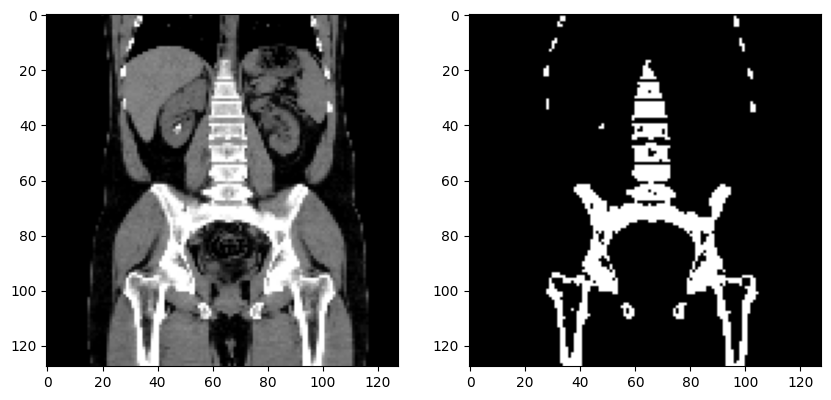

Kidney Stone Detected


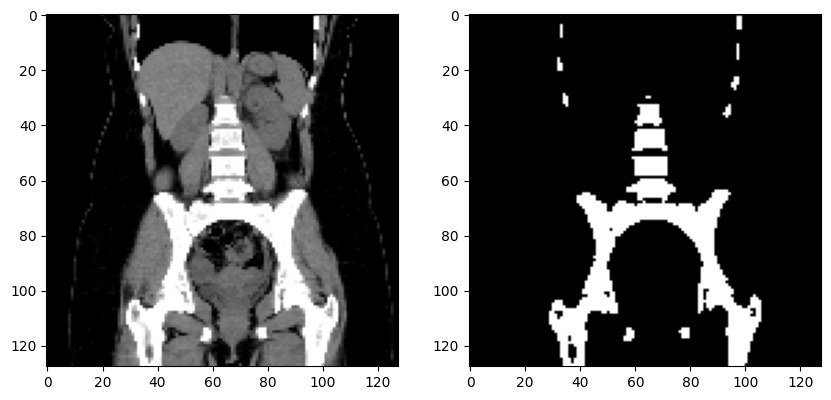

Kidney Stone Detected


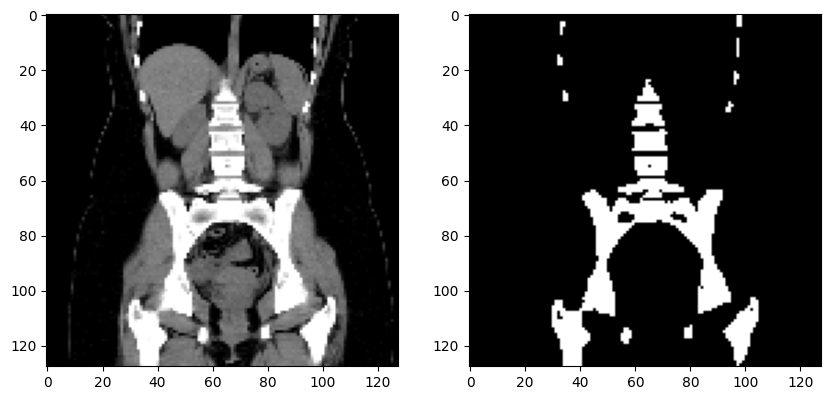

Normal


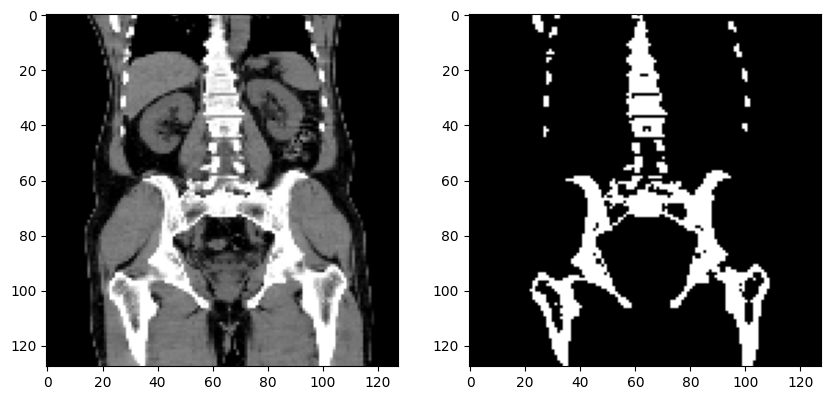

Normal


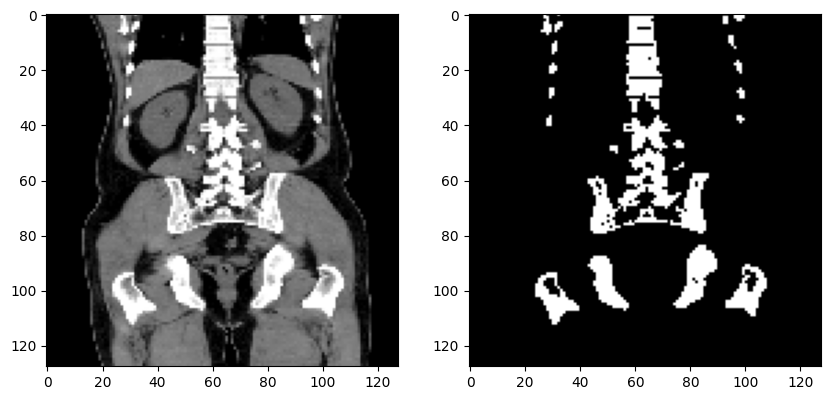

Normal


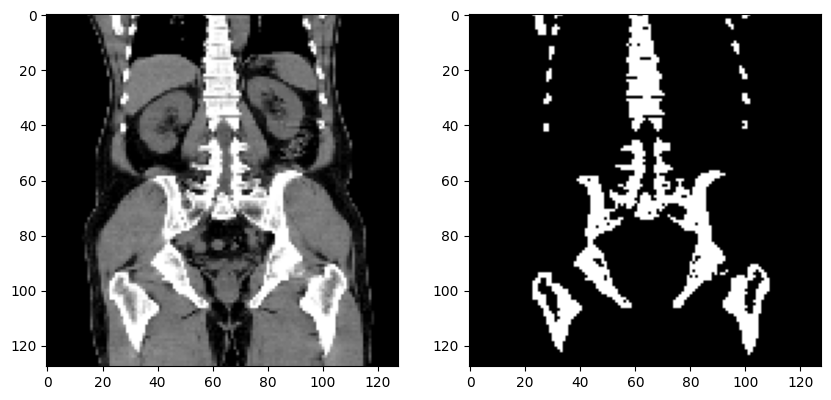

Kidney Stone Detected


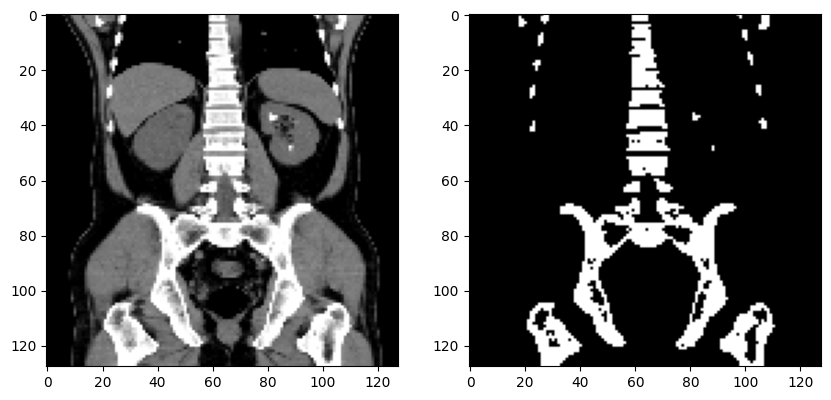

Kidney Stone Detected


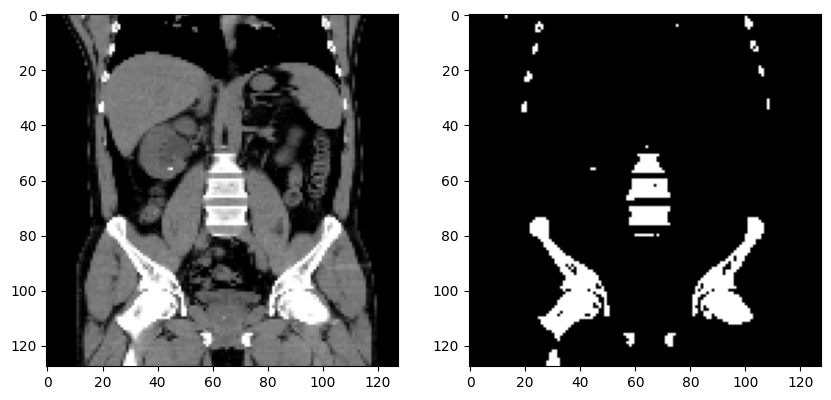

Kidney Stone Detected


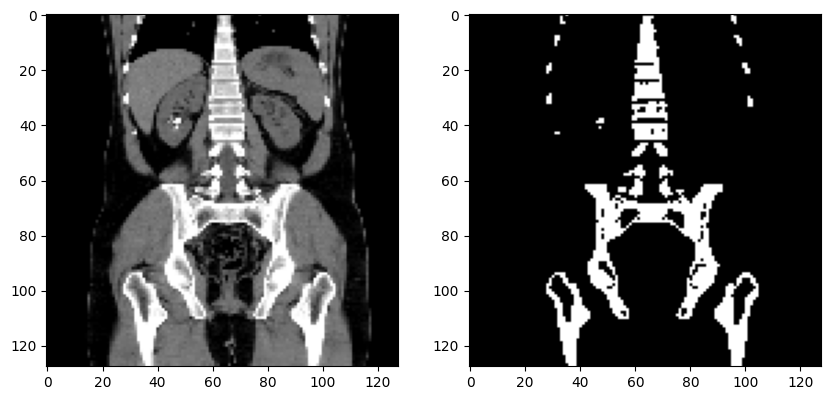

Kidney Stone Detected


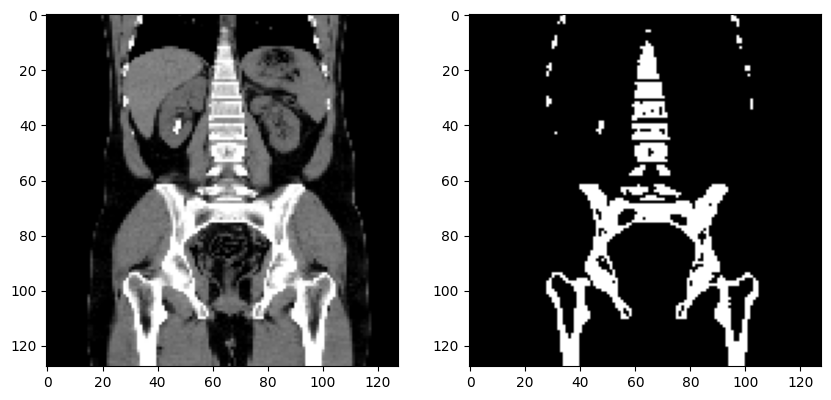

Kidney Stone Detected


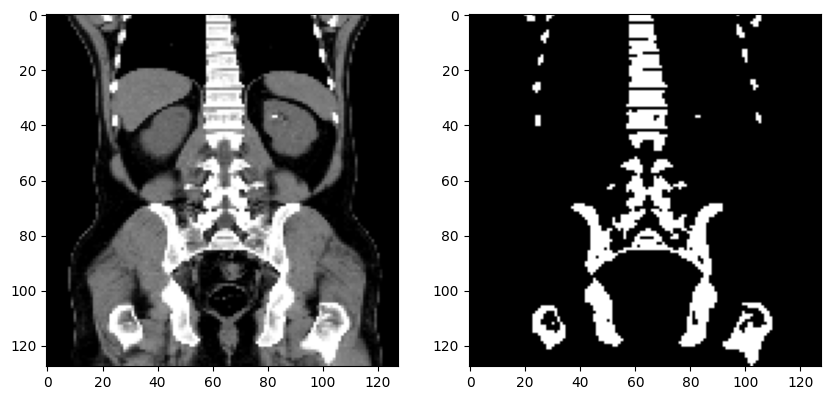

Normal


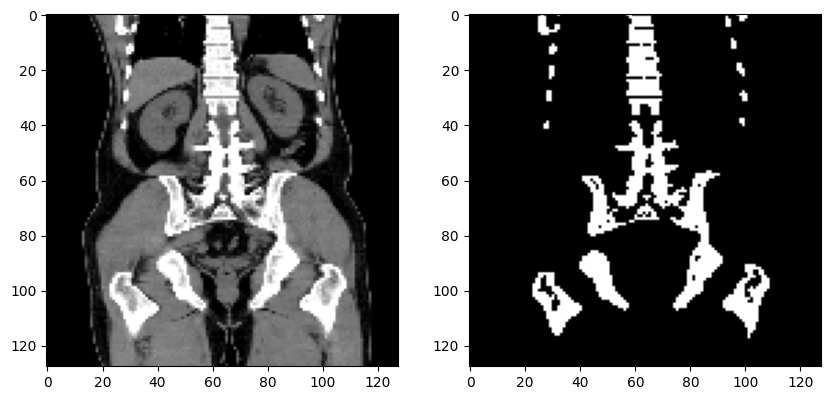

Kidney Stone Detected


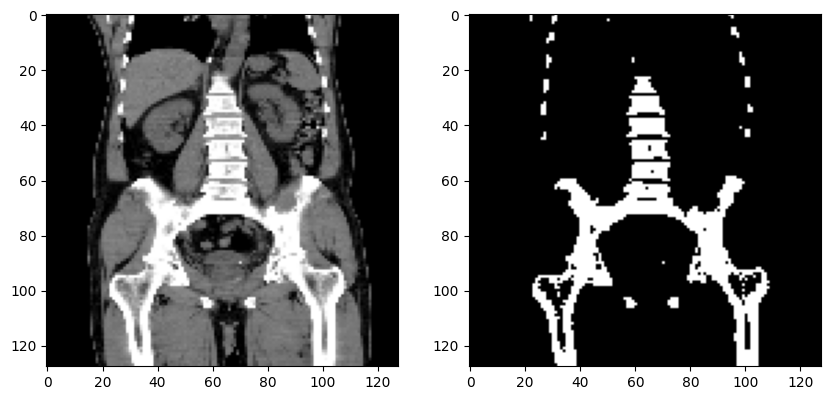

Kidney Stone Detected


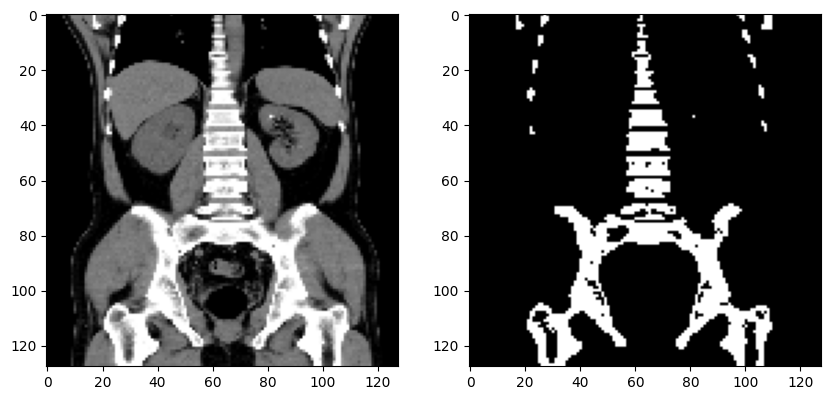

Kidney Stone Detected


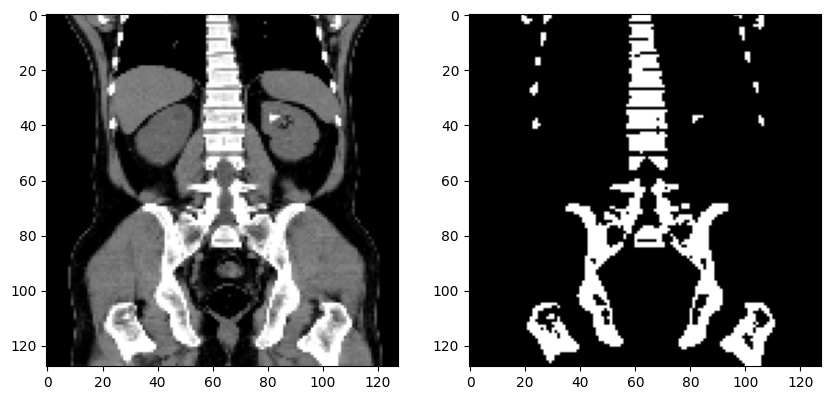

Normal


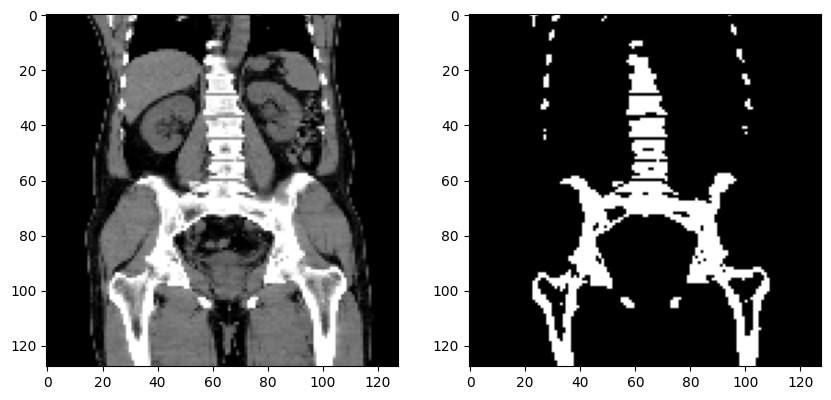

Kidney Stone Detected


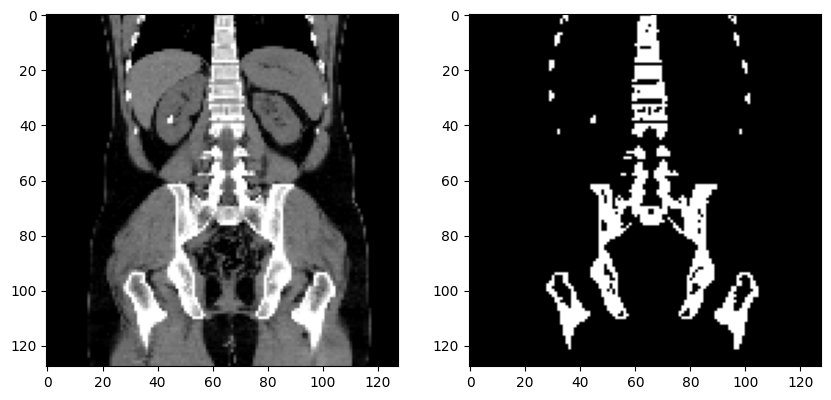

Normal


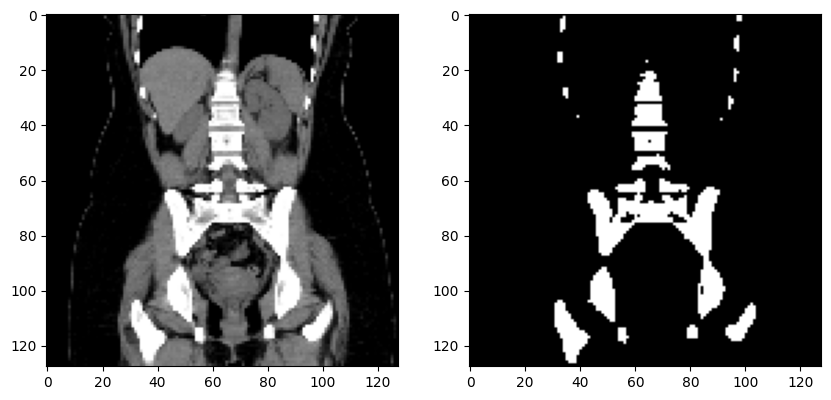

In [ ]:
x = 1
for i in range(len(processed_img)):
    if((ypred[[i]]>0.75)*1):
        print('Kidney Stone Detected')
    else:
        print('Normal')
    plt.figure(figsize=(10,128))
    plt.subplot(len(processed_img),2,x)
    x+=1
    plt.imshow(training_data1[i],cmap='gray')
    plt.subplot(len(processed_img),2,x)
    x+=1
    plt.imshow(processed_img[i],cmap='gray')
    plt.show()

Normal


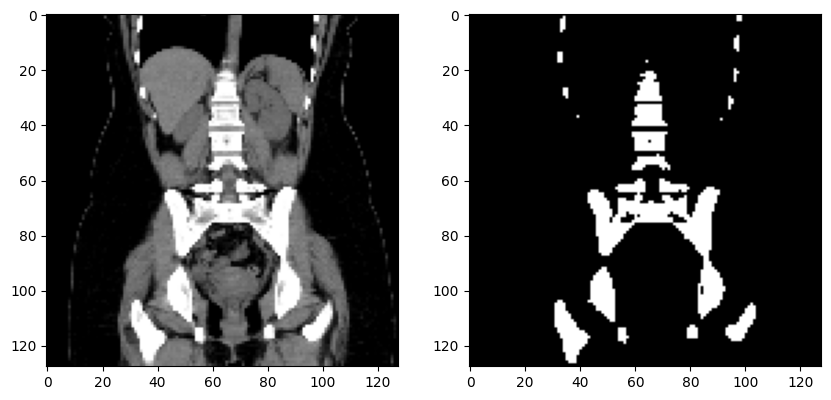

In [ ]:
if((ypred>0.75)*1):
    print('Kidney Stone Detected')
else:
    print('Normal')
plt.figure(figsize=(10,128))
plt.subplot(1,2,1)
plt.imshow(new_array,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(res,cmap='gray')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd

In [ ]:
mm=np.array([[83,1],[2,75]])

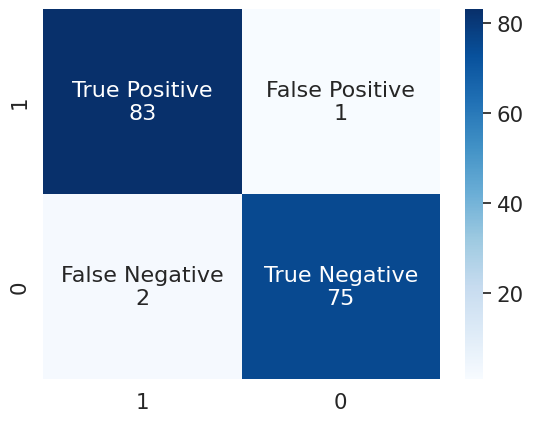

In [ ]:
import seaborn as sns
group_names = ['True Positive','False Positive','False Negative','True Negative']
group_counts = ['{0:0.0f}'.format(value) for value in mm.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.set(font_scale=1.4)
sns.heatmap(mm, annot=labels, fmt='',annot_kws={"size": 16},cmap='Blues',xticklabels=[1,0],yticklabels=[1,0],)
plt.show()
##accuracy=0.981

Precision: 28.666666666666668
Recall: 25.333333333333332
F1-score: 52.666666666666664
IoU: 0.6674815380697733
Dice Coefficient: 0.3529518193588301


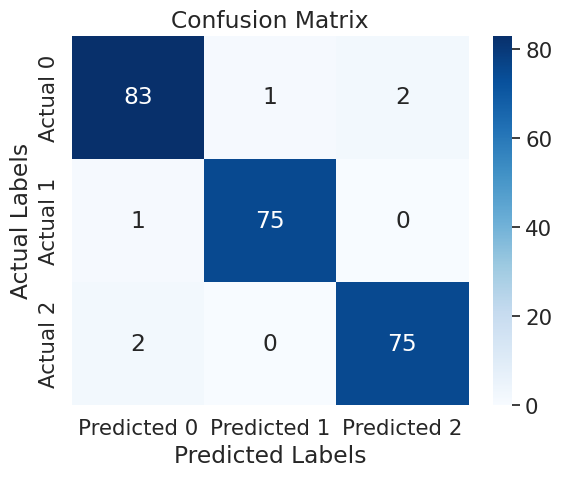

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix
cm = np.array([[83, 1, 2],
               [1, 75, 0],
               [2, 0, 75]])

# Precision
precision = np.mean(cm[:, 0])
print("Precision:", precision)

# Recall
recall = np.mean(cm[:, 1])
print("Recall:", recall)

# F1-score
f1 = np.mean(cm[:, 0] * cm[:, 1])
print("F1-score:", f1)

# IoU
iou = np.mean(cm[:, 0] / (cm[:, 0] + cm[:, 2]))
print("IoU:", iou)

# Dice Coefficient
dice = np.mean(2 * cm[:, 0] / (2 * cm[:, 0] + cm[:, 1] + cm[:, 2]))
print("Dice Coefficient:", dice)

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'],
            yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")

plt.show()


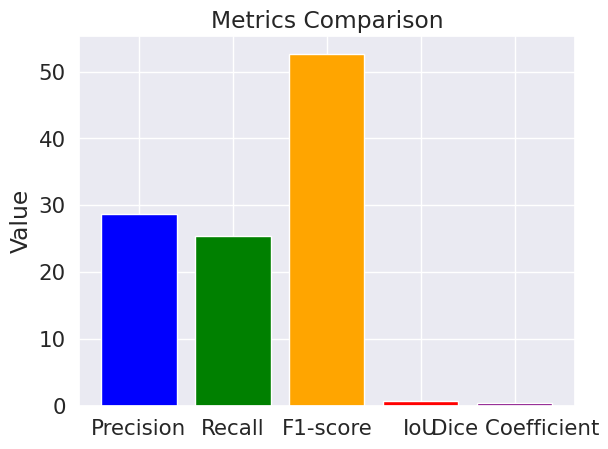

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Confusion matrix
cm = np.array([[83, 1, 2],
               [1, 75, 0],
               [2, 0, 75]])

# Calculate metrics
precision = np.mean(cm[:, 0])
recall = np.mean(cm[:, 1])
f1 = np.mean(cm[:, 0] * cm[:, 1])
iou = np.mean(cm[:, 0] / (cm[:, 0] + cm[:, 2]))
dice = np.mean(2 * cm[:, 0] / (2 * cm[:, 0] + cm[:, 1] + cm[:, 2]))

# Plot all metrics on the same bar chart
metrics = ['Precision', 'Recall', 'F1-score', 'IoU', 'Dice Coefficient']
values = [precision, recall, f1, iou, dice]

plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title('Metrics Comparison')
plt.ylabel('Value')
plt.show()


In [ ]:
?sns.heatmap

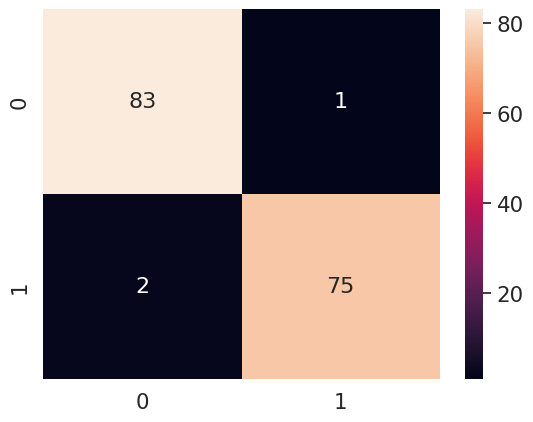

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[83,1],[2,75]]

df_cm = pd.DataFrame(array, range(2), range(2))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

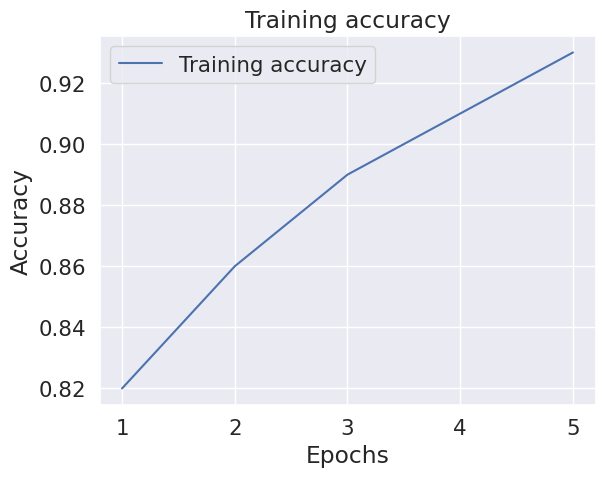

In [ ]:
# Assume accuracy is calculated and stored in the accuracy_values list
accuracy_values = [0.82, 0.86, 0.89, 0.91, 0.93]  # Example accuracy values
epochs = range(1, len(accuracy_values) + 1)

import matplotlib.pyplot as plt

plt.plot(epochs, accuracy_values, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
